<font color = "#CC3D3D">
# End-to-End Machine Learning Project #
<p>
- #### *Based on CRISP-DM & scikit-learn*    
<br>
<img align="left" src="http://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png" alt="CRISP-DM">

## Step 1: Business Understanding ##

1. Business Objectives
 - 새로운 개인연금상품(PEP: Personal Equity Plan)을 개발하여 기존 고객들을 대상으로 가능한 많은 계좌를 유치
2. Analytics Goals
 - PEP 가입 예측모형 개발
 - 고객 프로파일 개발
 - 다이렉트 메일 광고 효율성 제고 (안했다)
 - 타겟 메일링에 의한 응답률 제고 (안했다)

## Step 2: Data Understanding ##
1. 데이터 획득 절차
 - 기존고객 DB로부터 시험메일 발송을 위한 표본고객목록을 추출
 - 새로운 금융상품(PEP)의 제안 메일을 발송
 - 고객의 반응을 기록
2. 분석 데이터
 - 학습용 데이터 600건
 - 신규고객 데이터 200건

In [ ]:
modeling - machine learning 의 기뻡.
예측 알고리즘을 만든다 - 예측하는 모델

In [ ]:
evaluation - 평가를 해본다. 쓸만한가 아닌가

In [ ]:
Deployment - 적용을 해본다.

In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Collect Initial Data ###

##### for modeling

In [57]:
df = pd.read_csv("data_pepTestCustomers.csv")
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.10,1,3,1,0,1,1,0
2,ID12103,NaN,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.40,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61.0,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30.0,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31.0,0,3,15976.30,1,0,1,1,0,0,1
598,ID12699,29.0,1,0,14711.80,1,0,0,1,0,1,0


##### for deployment

In [58]:
new = pd.read_csv("data_pepNewCustomers.csv")
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0


### Describe Data ###

In [59]:
# 데이터 구조 살펴보기
# ex) age의 경우 600개중 540개만 있어서 60개가 결측치로 예상
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [60]:
# 수치형 속성의 요약통계 보기
df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,540.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.662963,0.500000,1.231667,27619.973883,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.299387,0.500417,1.286113,13187.408966,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.500000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,56.000000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,95435.200000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BB0BE1C88>,
      dtype=object)

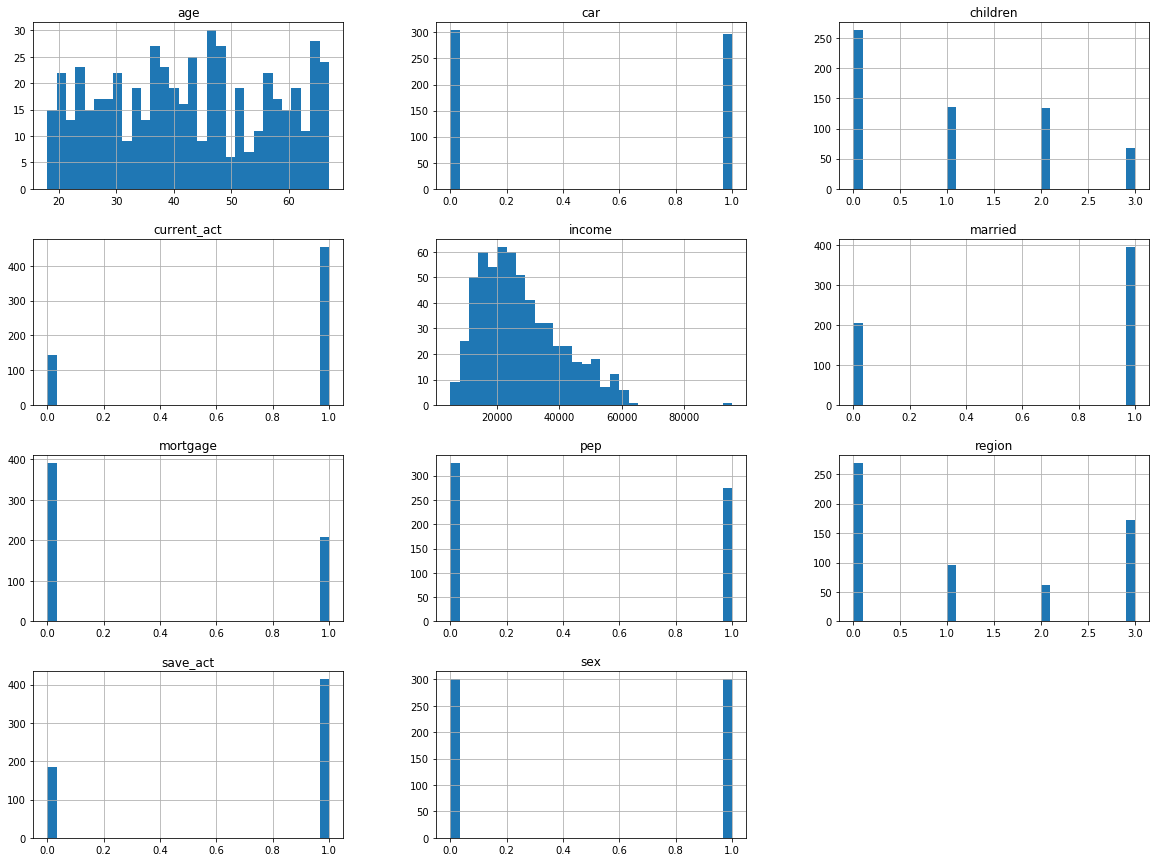

In [61]:
# 모든 수치형 속성에 대한 히스토그램 한꺼번에 그리기
# 숫치형은 age와 income 나머지는 범주형이라 볼 수 있다
# bins = 30 은 x축을 30개로 쪼개라
df.hist(bins=30, figsize=(20,15))

In [62]:
# 모형을 적용할 new 데이터에는 class 필드(즉, pep)가 없다.
display(df.shape) 
display(new.shape)

(600, 12)

(200, 11)

In [63]:
df.shape
new.shape

(200, 11)

### Explore Data ###

##### Look for Correlations #####
<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png" alt="correlation">

In [64]:
# 속성 간 피어슨 상관계수 출력하기
# 전체 수치형 데이터를 콜러에이션으로 보여 줌
# 상관관계 예측변수를 줄여줌

corr = df.corr() #어떤게 관게가 좋은지 보여줌
corr # 1.000 은 재외, 왜냐면 나와 나 를 비교기때문. 의미 없다.

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.127984,0.025891,0.743619,0.017157,0.023944,0.068454,0.171417,-0.035449,-0.030696,0.193604
sex,-0.127984,1.000000,-0.035018,-0.030606,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.025891,-0.035018,1.000000,0.009813,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.743619,-0.030606,0.009813,1.000000,-0.002977,0.042774,0.072590,0.265233,0.035036,-0.019666,0.225086
married,0.017157,0.021110,0.006188,-0.002977,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.023944,-0.014206,0.011520,0.042774,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.068454,0.006667,0.021860,0.072590,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.171417,0.007207,0.084382,0.265233,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.035449,-0.019466,-0.013356,0.035036,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.030696,0.066465,0.026083,-0.019666,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


In [ ]:
##상관계수 파이썬 시각화

In [53]:
import seaborn as sns

In [52]:
!pip install seaborn

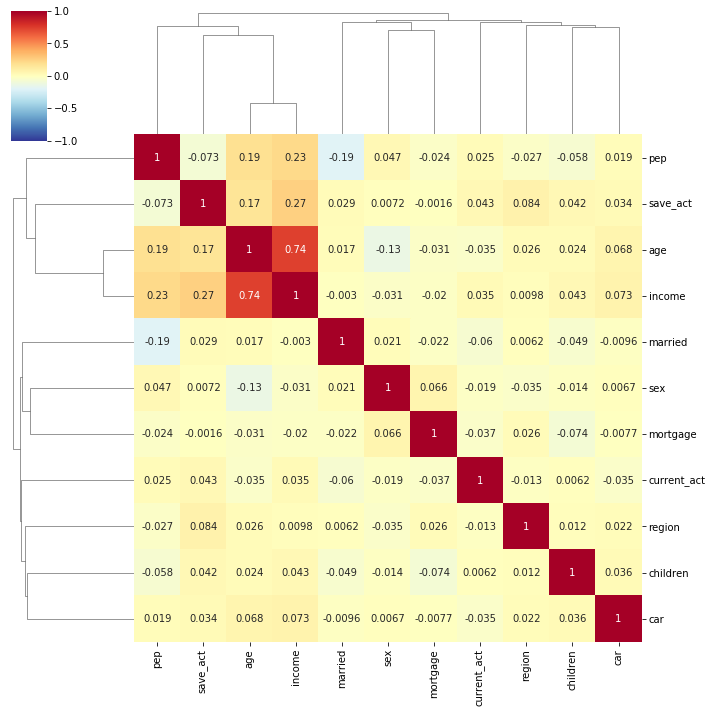

In [55]:
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

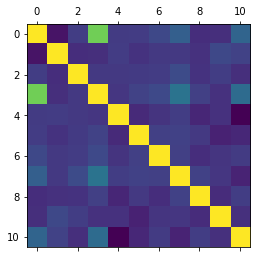

In [13]:
# 속성간 상관계수를 한눈에 파악하기 위해 그림으로 도식하기

plt.matshow(corr)

In [14]:
# 1 변수가 다 보이는 pyplot 찾아 적용하기
# 


In [65]:
# 클래스 변수인 pep와 각 속성간의 피어슨 상관계수를 내림차순으로 출력하기
# pep 데이터 sorting

corr.pep.sort_values(ascending=False)

pep            1.000000
income         0.225086
age            0.193604
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

##### Find Missing Values

In [66]:
# 결측값이 존재하는 속성이 무엇인지, 몇개나 있는지 파악할 수 있는 첫번째 방법

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [67]:
# 결측값이 존재하는 속성이 무엇인지, 몇개나 있는지 파악할 수 있는 두번째 방법
# null 갯수 체크

df.isnull().sum()

id              0
age            60
sex             0
region          0
income          0
married         0
children        0
car             0
save_act        0
current_act     0
mortgage        0
pep             0
dtype: int64

In [68]:
df.isnull().sum().sum()

60

##### Detect Outliers #####
<img align="left" src="http://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png" alt="Boxplot Outlier">

age       AxesSubplot(0.125,0.536818;0.775x0.343182)
income       AxesSubplot(0.125,0.125;0.775x0.343182)
dtype: object

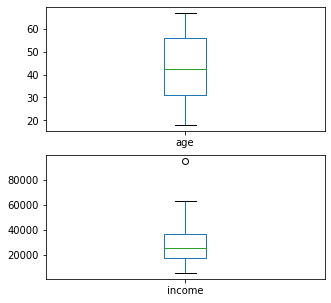

In [69]:
# 나이와 수입 속성에 이상치가 있는지 Boxplot을 그려서 알아본다.
# 이상치 발굴은 boxplot에서 박스 밖에 있는 점을 이상치(Outlier)로 본다.

df.loc[:,['age','income']].plot.box(subplots=True, layout=(2,1), figsize=(5,5))

## Step 3: Data Preparation ##

### Clean Data ###
##### Replace Missing Values #####

In [70]:
# Save original data 
# => 학습 데이터를 조작하다가 문제가 생겨 처음으로 되돌아 가려면 이 셀부터 다시 시작하세요 !!!
# 데이터 원본 유지를 이해 copy를 사용

mdf = df.copy()

In [71]:
# 결측값이 있는 속성 파악

mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [72]:
# 나이의 평균값과 나이별 발생빈도 계산하기
# 채워넣을 땐 평균 또는 최빈값(가장 많이 나오는 값)을 쓴다

display(mdf.age.mean())
display(mdf.age.value_counts().head())
# 평균나이 42.6
#40살이 19명
#64살이 18명
# 등등

42.662962962962965

40.0    19
64.0    18
58.0    17
27.0    17
43.0    17
Name: age, dtype: int64

In [73]:
# 평균값으로 결측값 대체하기
# fillna 는 널값을 채우라. 여기서는 평균으로 채우고 있음.
# 분석의 상황에 따라 null 값을 그대로 사용함.
 
mdf.age.fillna(round(mdf.age.mean(),0), inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [74]:
display(mdf.age.mean())
display(mdf.age.value_counts().head())

42.696666666666665

43.0    77
40.0    19
64.0    18
58.0    17
27.0    17
Name: age, dtype: int64

### Construct Data ###
##### Derive Attributes #####

In [75]:
# 명목소득 보다 명목소득을 자녀수로 나눈 실질소득이 개인연금 가입에 더 유효한 속성이라고 가정하고 이를 구현
# 자식에 따라 realincome 변수를 추가
# 중요한 부분****** column 추가*** 예측하기 더 좋다**
mdf['realincome'] = np.where(mdf['children']==0, mdf['income'], mdf['income']/mdf['children'])
mdf.head()
#np.where(mdf['children']==0 # 자녀가 없는건 따로 빼논다.
#이런 파생변수를 잘 만들어야 됀다****

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0,16575.400000
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0,50576.300000


<font color = "blue">
***[numpy.where(condition, x, y)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html#numpy.where)***<br>
***True이면 x를 , 그렇지 않으면 y ***<br>                                 
*return elements, either from x or y, depending on condition*

### Select Data ###
##### Filter Attributes  #####

In [28]:
# 파생변수인 실질소득을 유도하는데 사용된 명목소득과 자녀수를 제거
# pep와 상관관계가 거의 없는 current_act, car, mortgage, region 속성 제거
# 아래 컬럼은 없애고 분석하겠다.

columns = ['income', 'children', 'current_act', 'car', 'mortgage', 'region']
mdf = mdf.drop(columns, axis=1)
mdf.head()

,id,age,sex,married,save_act,pep,realincome
0,ID12101,48.0,0,0,0,1,17546.000000
1,ID12102,40.0,1,1,0,0,10028.366667
2,ID12103,43.0,0,1,1,0,16575.400000
3,ID12104,23.0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,1,0,50576.300000


### Split Data ###
<img align="left" src="https://www.developer.com/imagesvr_ce/6793/ML4.png" width=500 height=500 alt="Boxplot Outlier">

In [76]:
# for Hold-out validation

from sklearn.model_selection import train_test_split

In [77]:
# scikit-learn에서는 속성과 클래스를 분리하여야 한다.
#X 값 - id 는 object 그리고 pep. 의미 없다 해서 뺌

dfX = mdf.drop(['id','pep'], axis=1)  # exclude 'id' attribute & class variable
dfy = mdf['pep']                    # class variable
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [78]:
# 지정한 비율(75:25)로 데이터가 잘 나누어졌는지 확인

display(X_train.shape, X_test.shape)
X_train.head()

(450, 11)

(150, 11)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,realincome
46,50.0,0,0,13283.9,0,1,1,1,1,0,13283.9
263,60.0,0,0,46358.4,1,0,1,1,1,1,46358.4
458,18.0,1,2,13700.2,0,1,0,1,1,0,13700.2
230,59.0,0,0,30189.4,1,0,1,0,1,1,30189.4
107,23.0,1,0,13039.9,1,0,0,0,1,0,13039.9


## Step 4: Modeling ##
<br>
<font color = "blue">
**Scikit-Learn Estimator Interface**
1. Import the estimator
2. Instantiate the estimator
3. Fit the data to the estimator: **.fit()**
4. Generate a prediction: **.predict()**
5. Evaluate the estimator: **.score()**
</font>
*ref) "Introduction to Machine Learning with Python", pp.254*

### Build Model ###

<font color = "darkgreen">
##### 1. Decision Trees #####
</font>
<img align="left" src="https://cdn-images-1.medium.com/max/870/1*xzF10JmR3K0rnZ8jtIHI_g.png" width=700 height=500 alt="Decision Tree">

<font color = "blue">
***[sklearn.tree.DecisionTreeClassifier()](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)***

In [32]:
# 1. Import the estimator

from sklearn.tree import DecisionTreeClassifier

In [79]:
# 2. Instantiate the estimator

tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [80]:
# 3. Fit the data to the estimator

tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [81]:
# 4. Generate a prediction

pred_tree = tree.predict(X_test); pred_tree

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<font color = "darkgreen">
##### 2. SVM (Support Vector Machine) #####
<img align="left" src="https://78.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg"
width=500 height=500 alt="SVM">

<font color = "blue">
***[sklearn.svm.SVC()](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)***

In [82]:
from sklearn.svm import SVC 
svm = SVC(random_state=0) #svc 형으로 학습을 시켰다
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

<font color = "darkgreen">
##### 3. Neural Networks (Multi-layer Perceptron) #####
</font>  
<img align="left" src="https://3.bp.blogspot.com/-vYvrkXroyDY/WdObH7y6rBI/AAAAAAAAAZ0/nqYZCwLD2doT354ZJLI0HBkcY-Pjc8LqACLcBGAs/s1600/neural_nets_thumbnail.png" width=400 height=300 alt="NN">
<img align="left" src="https://cdn-images-1.medium.com/max/479/1*QVIyc5HnGDWTNX3m-nIm9w.png" width=600 height=400 alt="NN">

단지 클릭만으로 신경망 체험하기: [Neural Network Playground 실습](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises?hl=ko)

<font color = "blue">
***[sklearn.neural_network.MLPClassifier()](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)***

In [83]:
# 아래에 Neural Network 모형을 생성하는 코드를 작성하시오.
# 단, 모형을 저장하는 변수명을 mlp로 할 것!

from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Assess Model ###

<font color = "darkgreen">
##### 1. Decision Trees #####

In [84]:
# 5. Evaluate the estimator
# 

display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.94

0.8666666666666667

<font color = "darkgreen">
##### 2. SVM

In [85]:
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.66

0.6333333333333333

<font color = "darkgreen">
##### 3. Neural Networks

In [86]:
# 아래에 Neural Network 모형의 성능을 평가하는 코드를 작성하시오.

display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.5511111111111111

0.52

## Step 5: Evaluation ##

<font color = "red">
- *Which model is the best ?*
- *Is the model useful ?*
<font>

In [42]:
best_model = tree   # Change this code if the best model is not decision tree.
best_model.score(X_test, y_test)

0.66

In [43]:
# 랜덤 모형의 성능과 개발 모형의 성능을 비교한다.

from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)
# 0 이 78게
#1 이 72게

0    78
1    72
Name: pep, dtype: int64


0.52

## Step 6: Deployment ##

In [44]:
# You must do the same preprocessing as the modeling data.

ndf = new.copy()
ndf['realincome'] = np.where(ndf['children']==0, ndf['income'], ndf['income']/ndf['children'])
ndf = ndf.drop(columns, axis=1)
ndf.head()

,id,age,sex,married,save_act,realincome
0,ID12701,23,1,1,1,18766.90
1,ID12702,30,1,0,1,9915.67
2,ID12703,45,0,0,1,21881.60
3,ID12704,50,1,1,1,23397.20
4,ID12705,41,0,1,1,20721.10


### A Case: Apply the best model to select target customers ###

In [45]:
# 개발 모형에 고객 데이터를 적용하여 개인연금 구매여부를 예측: id 제외

ndf['pred'] = best_model.predict(ndf.loc[:,'age':'realincome'])

In [46]:
# 개인연금 구매확률을 예측: predict_proba() 사용
print(best_model.predict_proba(ndf.loc[:,'age':'realincome']))
ndf['pred_prob'] = best_model.predict_proba(ndf.loc[:,'age':'realincome'])[:,1]
ndf.head()

[[0.51470588 0.48529412]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.51470588 0.48529412]
 [0.13333333 0.86666667]
 [0.83870968 0.16129032]
 [0.7027027  0.2972973 ]
 [1.         0.        ]
 [0.1        0.9       ]
 [0.61538462 0.38461538]
 [0.         1.        ]
 [0.1        0.9       ]
 [0.51470588 0.48529412]
 [0.925      0.075     ]
 [0.7027027  0.2972973 ]
 [0.         1.        ]
 [0.1        0.9       ]
 [0.75       0.25      ]
 [1.         0.        ]
 [0.13333333 0.86666667]
 [0.925      0.075     ]
 [0.61538462 0.38461538]
 [0.83870968 0.16129032]
 [0.925      0.075     ]
 [1.         0.        ]
 [0.83870968 0.16129032]
 [0.83870968 0.16129032]
 [0.1        0.9       ]
 [1.         0.        ]
 [0.13333333 0.86666667]
 [0.925      0.075     ]
 [0.925      0.075     ]
 [0.925      0.075     ]
 [0.51470588 0.48529412]
 [0.         1.        ]
 [0.51470588 0.48529412]
 [0.7027027  0.2972973 ]
 [1.         0.        ]
 [1.         0.        ]


,id,age,sex,married,save_act,realincome,pred,pred_prob
0,ID12701,23,1,1,1,18766.90,0,0.485294
1,ID12702,30,1,0,1,9915.67,0,0.000000
2,ID12703,45,0,0,1,21881.60,1,1.000000
3,ID12704,50,1,1,1,23397.20,1,1.000000
4,ID12705,41,0,1,1,20721.10,0,0.485294


In [47]:
# 특정 조건을 만족하는 고객 리스트를 추출하고 저장
# query 조건 만족 행을 뽑을 때 사용

target = ndf.query('pred == 1 & pred_prob > 0.7')  # PEP에 가입할 확율이 70%가 넘는 고객만 추출
target.sort_values(by="pred_prob", ascending=False).to_csv("pep_target.csv", index=False)
pd.read_csv("pep_target.csv").tail()

,id,age,sex,married,save_act,realincome,pred,pred_prob
56,ID12869,41,1,0,1,21122.6,1,0.866667
57,ID12798,37,1,0,1,31979.9,1,0.866667
58,ID12755,34,1,0,1,17221.3,1,0.866667
59,ID12706,20,1,0,1,16688.5,1,0.866667
60,ID12782,44,1,0,1,39202.2,1,0.866667


In [ ]:
# 과제
# 1 변수가 다 보이는 pyplot 찾아 적용하기
# 2 예측율 올리기 - 66%+
# 3 추가로 예측알로리즘 찾아서 적용

In [56]:
ndf

,id,age,sex,married,save_act,realincome,pred,pred_prob
0,ID12701,23,1,1,1,18766.90,0,0.485294
1,ID12702,30,1,0,1,9915.67,0,0.000000
2,ID12703,45,0,0,1,21881.60,1,1.000000
3,ID12704,50,1,1,1,23397.20,1,1.000000
4,ID12705,41,0,1,1,20721.10,0,0.485294
...,...,...,...,...,...,...,...,...
195,ID12896,66,1,0,1,58792.60,1,1.000000
196,ID12897,19,1,0,1,8953.40,0,0.250000
197,ID12898,54,1,0,0,29348.80,1,1.000000
198,ID12899,42,0,1,1,20552.50,0,0.485294
